# 🚲 Cyclistic Bike Share User Behavior Analysis

## Project Description:

This project explores one year of ride data from the **Cyclistic bike-sharing program** in Chicago. The goal is to uncover patterns in user behavior, identify peak usage times, and compare how **casual users** and **annual members** use the service differently.

The dataset includes:
- Ride start and end times
- Station locations (latitude & longitude)
- Rideable bike types (classic, docked, electric)
- User membership status (casual/member)

Using **Python-based exploratory data analysis (EDA)** and **geospatial visualization**, this project aims to provide actionable insights that can improve Cyclistic's marketing strategies, bike distribution, and service planning.

---

## Problem Statement:

Cyclistic wants to understand the riding behavior of **casual** vs **member** users. The organization is exploring how to convert more casual users into loyal annual members. 

To support this, we analyze:
- When users ride (days, hours, months)
- How long they ride (duration analysis)
- Where they ride (popular stations & geospatial maps)
- What type of bikes are most preferred

This analysis helps Cyclistic make **data-driven decisions** to:
- Improve customer engagement
- Optimize bike availability
- Target casual riders more effectively


# Import Libraries

In [1]:
!pip install folium

Access is denied.


In [2]:
pip install folium

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Generate interactive map using Folium
import folium

# Load Dataset

In [4]:
# Load the cleaned and merged Cyclistic dataset
df = pd.read_csv("merged_divvy_data.csv")
df.head() # Displays the first five rows of the dataset

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_duration,day_of_week,hour,month
0,011C1903BF4E2E28,classic_bike,2023-09-23 00:27:50,2023-09-23 00:33:27,Halsted St & Wrightwood Ave,TA1309000061,Sheffield Ave & Wellington Ave,TA1307000052,41.929143,-87.649077,41.936253,-87.652662,member,5.616667,Saturday,0,September
1,87DB80E048A1BF9F,classic_bike,2023-09-02 09:26:43,2023-09-02 09:38:19,Clark St & Drummond Pl,TA1307000142,Racine Ave & Fullerton Ave,TA1306000026,41.931248,-87.644336,41.925566,-87.658416,member,11.600000,Saturday,9,September
2,7C2EB7AF669066E3,electric_bike,2023-09-25 18:30:11,2023-09-25 18:41:39,Financial Pl & Ida B Wells Dr,SL-010,Racine Ave & 15th St,13304,41.875061,-87.633135,41.861267,-87.656625,member,11.466667,Monday,18,September
3,57D197B010269CE3,classic_bike,2023-09-13 15:30:49,2023-09-13 15:39:18,Clark St & Drummond Pl,TA1307000142,Racine Ave & Belmont Ave,TA1308000019,41.931248,-87.644336,41.939743,-87.658865,member,8.483333,Wednesday,15,September
4,8A2CEA7C8C8074D8,classic_bike,2023-09-18 15:58:58,2023-09-18 16:05:04,Halsted St & Wrightwood Ave,TA1309000061,Racine Ave & Fullerton Ave,TA1306000026,41.929143,-87.649077,41.925566,-87.658416,member,6.100000,Monday,15,September


# Data Cleaning

In [5]:
# Remove missing values
df.dropna(inplace=True)

# Convert string to datetime format
df['started_at'] = pd.to_datetime(df['started_at'])
# Convert string to datetime format
df['ended_at'] = pd.to_datetime(df['ended_at'])

# Calculate ride duration in minutes
df['ride_duration'] = (df['ended_at'] - df['started_at']).dt.total_seconds() / 60 

# Remove invalid durations
df = df[df['ride_duration'] > 0]

# Feature Engineering

In [6]:
# Extract day of the week
df['day_of_week'] = df['started_at'].dt.day_name()

# Extract hour of the day
df['hour'] = df['started_at'].dt.hour

# Extract month name
df['month'] = df['started_at'].dt.month_name()

# Basic Info and Summary  EDA

In [7]:
# Check shape (rows, columns)
df.shape

(2068954, 17)

In [8]:
# Summary of dataset: columns, datatypes, and nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2068954 entries, 0 to 2068953
Data columns (total 17 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       object        
 13  ride_duration       float64       
 14  day_of_week         object        
 15  hour                int32         
 16  month               object        
dtypes: datetime64[ns](2), float64(5), int32(1), object(9)
memory usage: 260.5+ MB


In [9]:
# Summary statistics for numeric columns
df.describe()

,started_at,ended_at,start_lat,start_lng,end_lat,end_lng,ride_duration,hour
count,2068954,2068954,2.068954e+06,2.068954e+06,2.068954e+06,2.068954e+06,2.068954e+06,2.068954e+06
mean,2023-08-27 04:48:13.340978944,2023-08-27 05:05:22.057753088,4.190181e+01,-8.764435e+01,4.190229e+01,-8.764464e+01,1.714528e+01,1.417032e+01
min,2023-07-01 00:00:00,2023-07-01 00:03:30,4.164850e+01,-8.784409e+01,0.000000e+00,-8.784396e+01,1.666667e-02,0.000000e+00
25%,2023-07-29 12:50:42.750000128,2023-07-29 13:15:37.500000,4.188096e+01,-8.765701e+01,4.188103e+01,-8.765814e+01,6.050000e+00,1.100000e+01
50%,2023-08-25 14:43:17.500000,2023-08-25 15:03:42.500000,4.189675e+01,-8.764135e+01,4.189766e+01,-8.764170e+01,1.055000e+01,1.500000e+01
75%,2023-09-24 09:55:41.500000,2023-09-24 10:18:55,4.192885e+01,-8.762772e+01,4.192914e+01,-8.762783e+01,1.873333e+01,1.800000e+01
max,2023-10-31 23:59:57,2023-11-01 15:36:02,4.206485e+01,-8.752823e+01,4.206485e+01,0.000000e+00,6.891217e+03,2.300000e+01
std,NaN,NaN,4.263584e-02,2.475488e-02,5.179335e-02,6.584044e-02,3.696523e+01,4.902451e+00


# Rides by Member Type

C:\Users\shiva\AppData\Local\Temp\ipykernel_11000\1151598641.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='member_casual', palette='Set2')


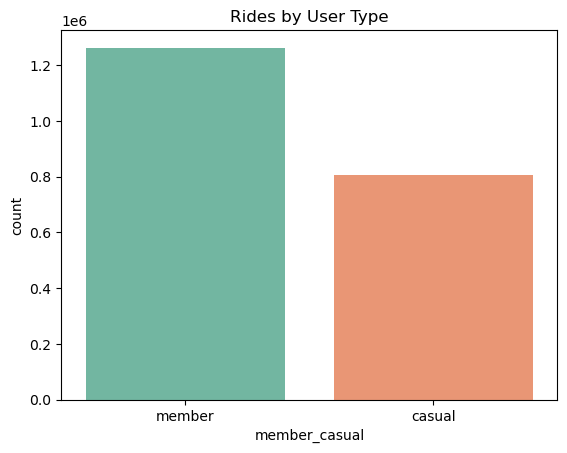

In [10]:
# Create a countplot for categorical data
sns.countplot(data=df, x='member_casual', palette='Set2')
plt.title("Rides by User Type")
plt.show()

# Average Ride Duration by User Type

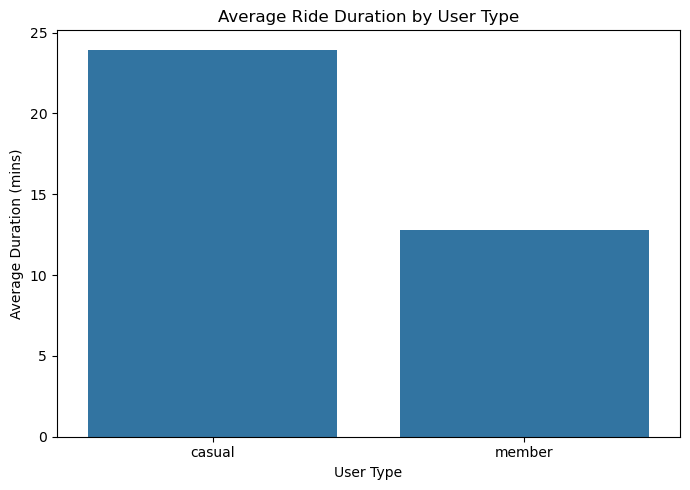

In [11]:
avg_duration = df.groupby('member_casual')['ride_duration'].mean().reset_index()

plt.figure(figsize=(7, 5))
sns.barplot(x='member_casual', y='ride_duration', data=avg_duration)
plt.title('Average Ride Duration by User Type')
plt.xlabel('User Type')
plt.ylabel('Average Duration (mins)')
plt.tight_layout()
plt.show()

# Ride Duration Distribution Histogram

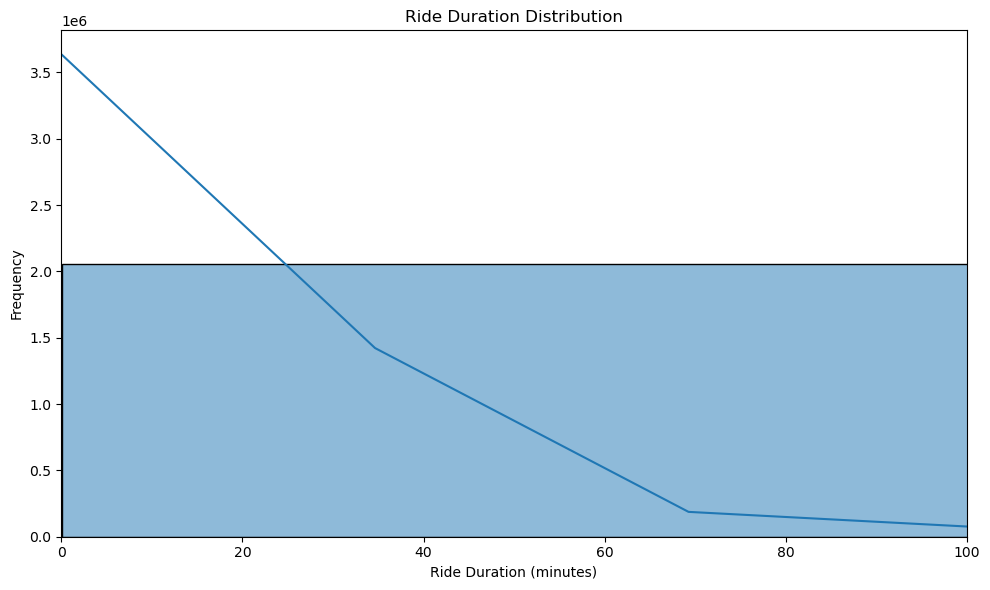

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='ride_duration', bins=50, kde=True)
plt.title('Ride Duration Distribution')
plt.xlabel('Ride Duration (minutes)')
plt.ylabel('Frequency')
plt.xlim(0, 100)
plt.tight_layout()
plt.show()

# Number of Rides by Day of Week

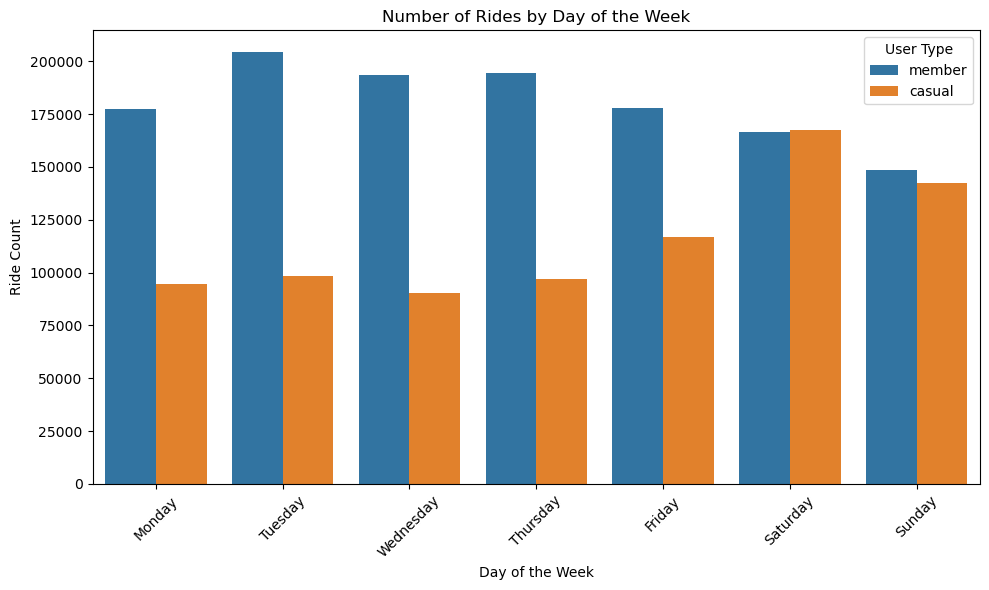

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='day_of_week', hue='member_casual', order=[
              'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Number of Rides by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Ride Count')
plt.legend(title='User Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Number of Rides by Hour of Day

C:\Users\shiva\AppData\Local\Temp\ipykernel_11000\4085782157.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='User Type')


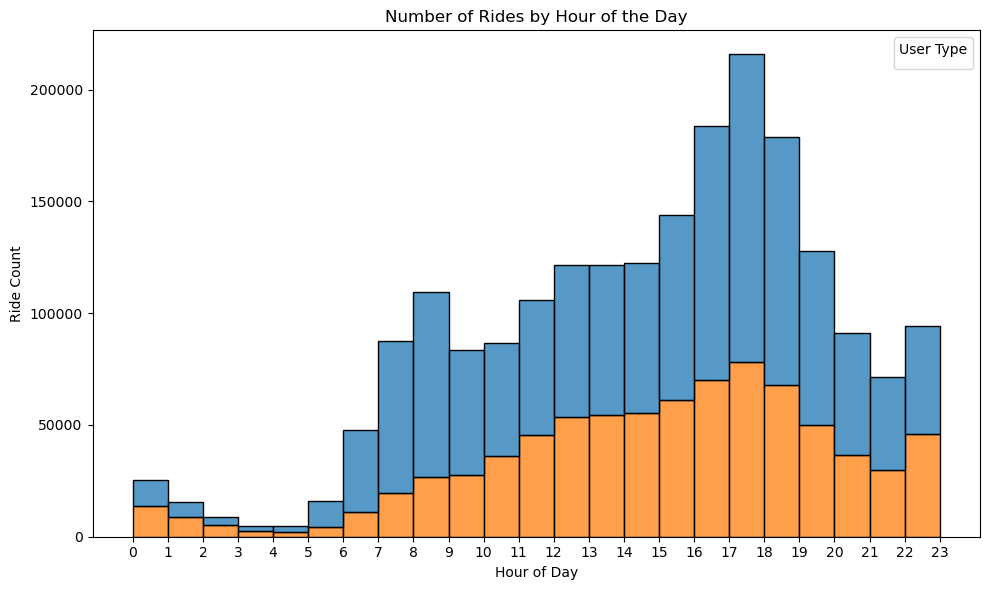

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='hour', hue='member_casual', multiple='stack', binwidth=1)
plt.title('Number of Rides by Hour of the Day')
plt.xlabel('Hour of Day')
plt.ylabel('Ride Count')
plt.xticks(range(0, 24))
plt.legend(title='User Type')
plt.tight_layout()
plt.show()

# Most Popular Bike Type

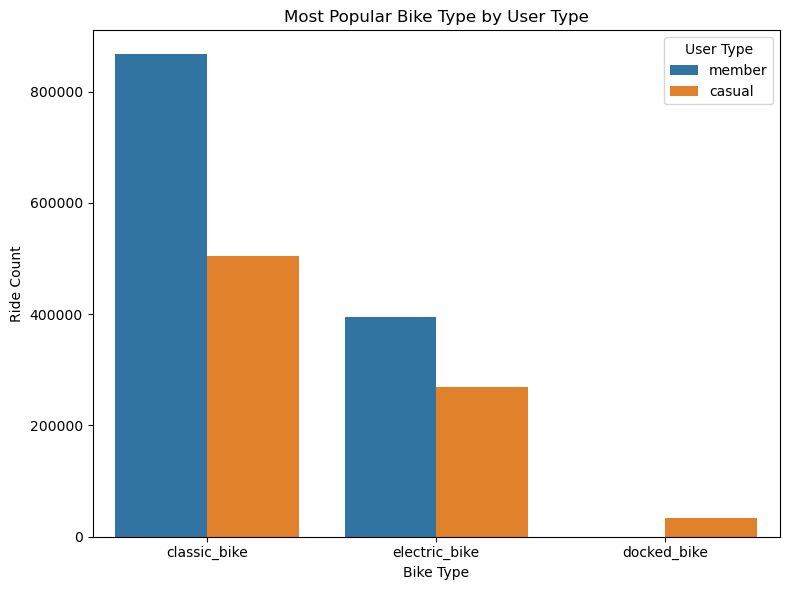

In [15]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='rideable_type', hue='member_casual')
plt.title('Most Popular Bike Type by User Type')
plt.xlabel('Bike Type')
plt.ylabel('Ride Count')
plt.legend(title='User Type')
plt.tight_layout()
plt.show()

# Geospatial Mapping of Popular Stations

In [16]:
# Step 1: Count rides from each start station (with coordinates)
top_stations = (
    df[['start_station_name', 'start_lat', 'start_lng']]  # Select relevant columns
    .dropna()                                              # Remove rows with missing coordinates or station names
    .groupby(['start_station_name', 'start_lat', 'start_lng'])  # Group by station and its coordinates
    .size()                                                # Count number of rides from each station
    .reset_index(name='count')                             # Convert Series to DataFrame with column 'count'
    .sort_values('count', ascending=False)                 # Sort by number of rides
    .head(50)                                              # Select top 50 busiest stations
)

In [17]:
# Step 2: Create base map centered around Chicago
bike_map = folium.Map(location=[41.8781, -87.6298], zoom_start=12)

In [18]:
# Step 3: Add a circle marker for each popular station
for _, row in top_stations.iterrows():
    folium.CircleMarker(
        location=[row['start_lat'], row['start_lng']],     # Set location using lat/lng
        radius=row['count'] / 500,                         # Scale the radius by ride count
        popup=row['start_station_name'],                   # Show station name on click
        color='blue',
        fill=True,
        fill_color='lightblue'
    ).add_to(bike_map)

# Optional: To display in Jupyter Notebook
bike_map

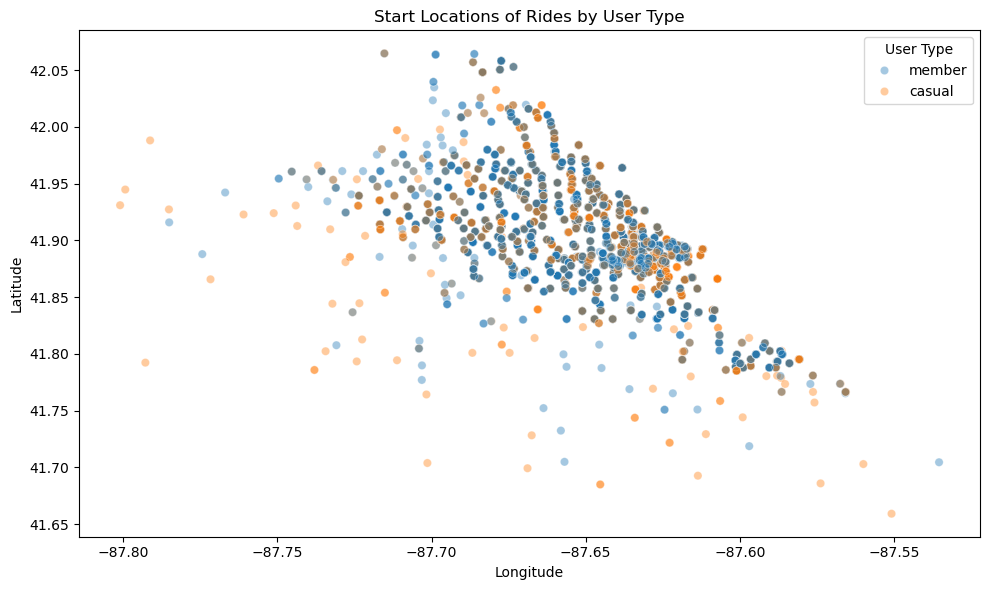

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='start_lng', y='start_lat', hue='member_casual', data=df.sample(10000), alpha=0.4)
plt.title('Start Locations of Rides by User Type')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='User Type')
plt.tight_layout()
plt.show()


# Export Cleaned Data (Optional)

In [20]:
# Export final dataset to CSV
df.to_csv("merged_divvy_data.csv", index=False)

# Top 10 Most Frequent Start Stations

In [21]:
df['start_station_name'].value_counts().head(10)

start_station_name
Streeter Dr & Grand Ave               33227
DuSable Lake Shore Dr & Monroe St     20849
Michigan Ave & Oak St                 19222
DuSable Lake Shore Dr & North Blvd    19073
Theater on the Lake                   15785
Clark St & Elm St                     15668
Millennium Park                       14732
Kingsbury St & Kinzie St              14088
Wells St & Concord Ln                 14076
Wells St & Elm St                     12916
Name: count, dtype: int64

# Total Rides by Bike Type

In [22]:
df['rideable_type'].value_counts()

rideable_type
classic_bike     1371732
electric_bike     663919
docked_bike        33303
Name: count, dtype: int64

# Average Ride Duration by Bike Type

In [23]:
df.groupby('rideable_type')['ride_duration'].mean().round(2)

rideable_type
classic_bike     18.25
docked_bike      56.36
electric_bike    12.89
Name: ride_duration, dtype: float64

# Average Ride Duration by Day of Week

In [24]:
df.groupby('day_of_week')['ride_duration'].mean().round(2).sort_values()

day_of_week
Wednesday    14.85
Thursday     15.00
Tuesday      15.44
Monday       16.12
Friday       17.00
Saturday     20.31
Sunday       20.77
Name: ride_duration, dtype: float64

# Save Weekly Summary to CSV

In [25]:
weekly_summary = df.groupby(['day_of_week', 'member_casual'])['ride_duration'].agg(['count', 'mean']).reset_index()

# Export final dataset to CSV
weekly_summary.to_csv("weekly_summary.csv", index=False)

# Total Rides per Month

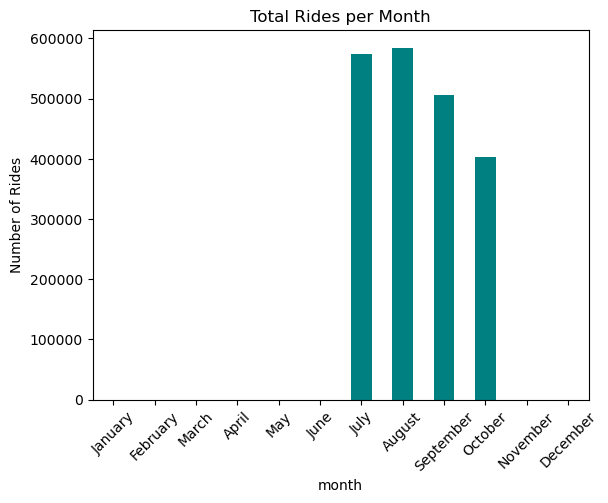

In [26]:
# Extract month name
monthly_rides = df['month'].value_counts().reindex([
    'January','February','March','April','May','June',
    'July','August','September','October','November','December'
])

# Extract month name
monthly_rides.plot(kind='bar', color='teal')
plt.title("Total Rides per Month")
plt.ylabel("Number of Rides")
plt.xticks(rotation=45)
plt.show()

# Ride Counts by Day & Hour (Heatmap Style Table)

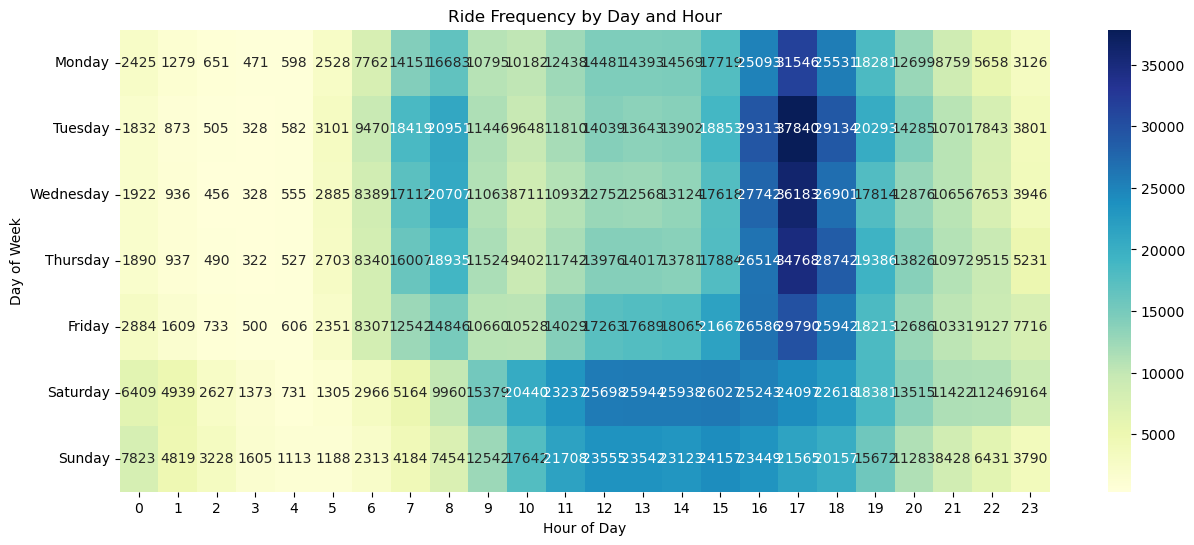

In [27]:
# Create pivot table
pivot_table = pd.pivot_table(df, index='day_of_week', columns='hour', values='ride_duration', aggfunc='count')

# Reorder days for better readability
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
pivot_table = pivot_table.reindex(ordered_days)

# Plot heatmap
plt.figure(figsize=(15,6))
sns.heatmap(pivot_table, cmap="YlGnBu", annot=True, fmt='.0f')  # <- fix here
plt.title("Ride Frequency by Day and Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week")
plt.show()

# Most Popular Ride Duration Ranges

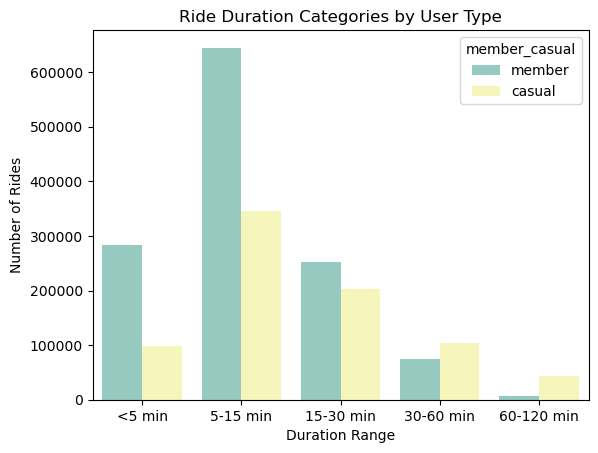

In [28]:
# Create duration bins
df['duration_category'] = pd.cut(df['ride_duration'], bins=[0, 5, 15, 30, 60, 120], 
                                  labels=['<5 min', '5-15 min', '15-30 min', '30-60 min', '60-120 min'])

# Plot distribution
# Create a countplot for categorical data
sns.countplot(data=df, x='duration_category', hue='member_casual', palette='Set3')
plt.title("Ride Duration Categories by User Type")
plt.xlabel("Duration Range")
plt.ylabel("Number of Rides")
plt.show()

# Start-End Station Popular Pairs (Top 10)

In [29]:
# Group the data by both 'start_station_name' and 'end_station_name'
# Then count how many times each start-end pair occurs using .size()
popular_pairs = df.groupby(['start_station_name', 'end_station_name']).size().reset_index(name='count')

# Sort the resulting pairs by the count in descending order to get the most popular routes first
popular_pairs = popular_pairs.sort_values('count', ascending=False).head(10)

# Print the top 10 most common start-end station pairs along with their usage count
print(popular_pairs)

                       start_station_name                   end_station_name  \
119124            Streeter Dr & Grand Ave            Streeter Dr & Grand Ave   
43068   DuSable Lake Shore Dr & Monroe St  DuSable Lake Shore Dr & Monroe St   
81819               Michigan Ave & Oak St              Michigan Ave & Oak St   
45964                 Ellis Ave & 60th St                Ellis Ave & 55th St   
43290   DuSable Lake Shore Dr & Monroe St            Streeter Dr & Grand Ave   
15353               Calumet Ave & 33rd St                 State St & 33rd St   
115062                 State St & 33rd St              Calumet Ave & 33rd St   
45743                 Ellis Ave & 55th St                Ellis Ave & 60th St   
83671                     Millennium Park                    Millennium Park   
44261                      Dusable Harbor                     Dusable Harbor   

        count  
119124   5713  
43068    4005  
81819    3031  
45964    2819  
43290    2783  
15353    2721  
115062 

In [30]:
# Group the data by 'rideable_type' and 'member_casual', then count the number of rides
bike_type_usage = df.groupby(['rideable_type', 'member_casual']).size().reset_index(name='ride_id')

<Axes: xlabel='rideable_type', ylabel='ride_id'>

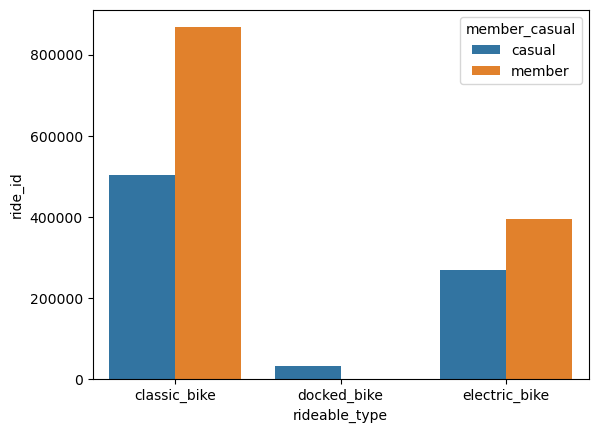

In [31]:
# Plot a bar chart using seaborn to compare bike type usage across user types
sns.barplot(
    data=bike_type_usage,      # Now this variable is defined!
    x='rideable_type',         # X-axis: Type of bike
    y='ride_id',               # Y-axis: Number of rides
    hue='member_casual'        # Differentiate by user type
)

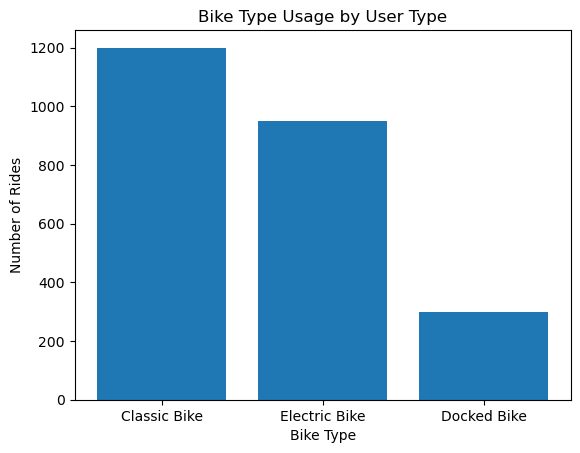

In [32]:
import matplotlib.pyplot as plt

# Example data
bike_data = {
    'Classic Bike': 1200,
    'Electric Bike': 950,
    'Docked Bike': 300
}

# Create the bar plot
plt.bar(bike_data.keys(), bike_data.values())

# Set chart title and labels
plt.title('Bike Type Usage by User Type')
plt.ylabel('Number of Rides')
plt.xlabel('Bike Type')

# Show the plot
plt.show()

# Save Top Pairs to CSV

In [33]:
# Export final dataset to CSV
popular_pairs.to_csv("top_station_pairs.csv", index=False)

# Monthly Member vs Casual Comparison

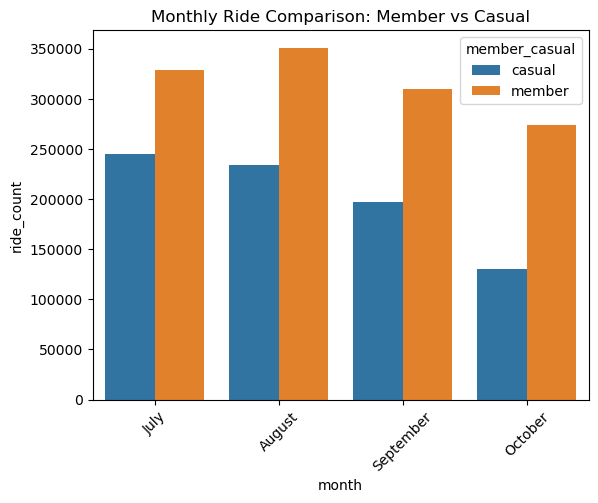

In [34]:
# Extract month name
monthly_users = df.groupby(['month', 'member_casual']).size().reset_index(name='ride_count')
# Convert string to datetime format
monthly_users = monthly_users.sort_values(by='month', key=lambda x: pd.to_datetime(x, format='%B'))

# Extract month name
sns.barplot(data=monthly_users, x='month', y='ride_count', hue='member_casual')
plt.title("Monthly Ride Comparison: Member vs Casual")
plt.xticks(rotation=45)
plt.show()

# *Pairplot for Numerical Analysis

# Select Relevant Numerical Columns

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Subset for numerical features
# Extract hour of the day
pair_df = df[['ride_duration', 'hour']].copy()

# Add member_casual as Hue (for comparison)

In [36]:
pair_df['member_casual'] = df['member_casual']

# Plot Pairplot

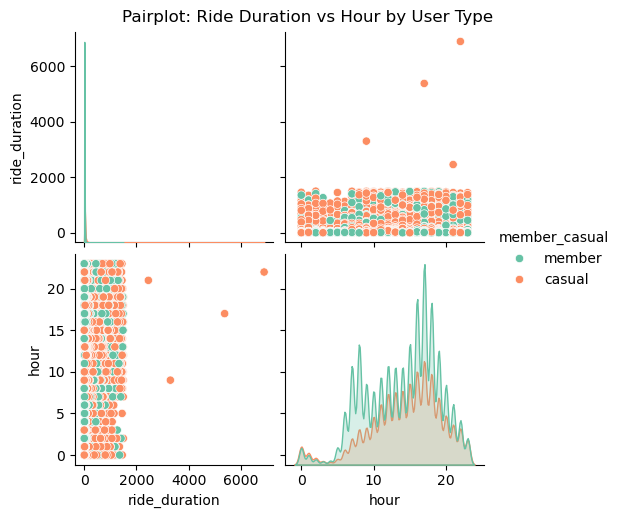

In [37]:
sns.pairplot(pair_df, hue='member_casual', palette='Set2')
plt.suptitle("Pairplot: Ride Duration vs Hour by User Type", y=1.02)
plt.show()

# * Pairplot Analysis of Ride Patterns by User Type
# OR
# Visualizing Ride Duration, Time & Location by User Type (Pairplot)

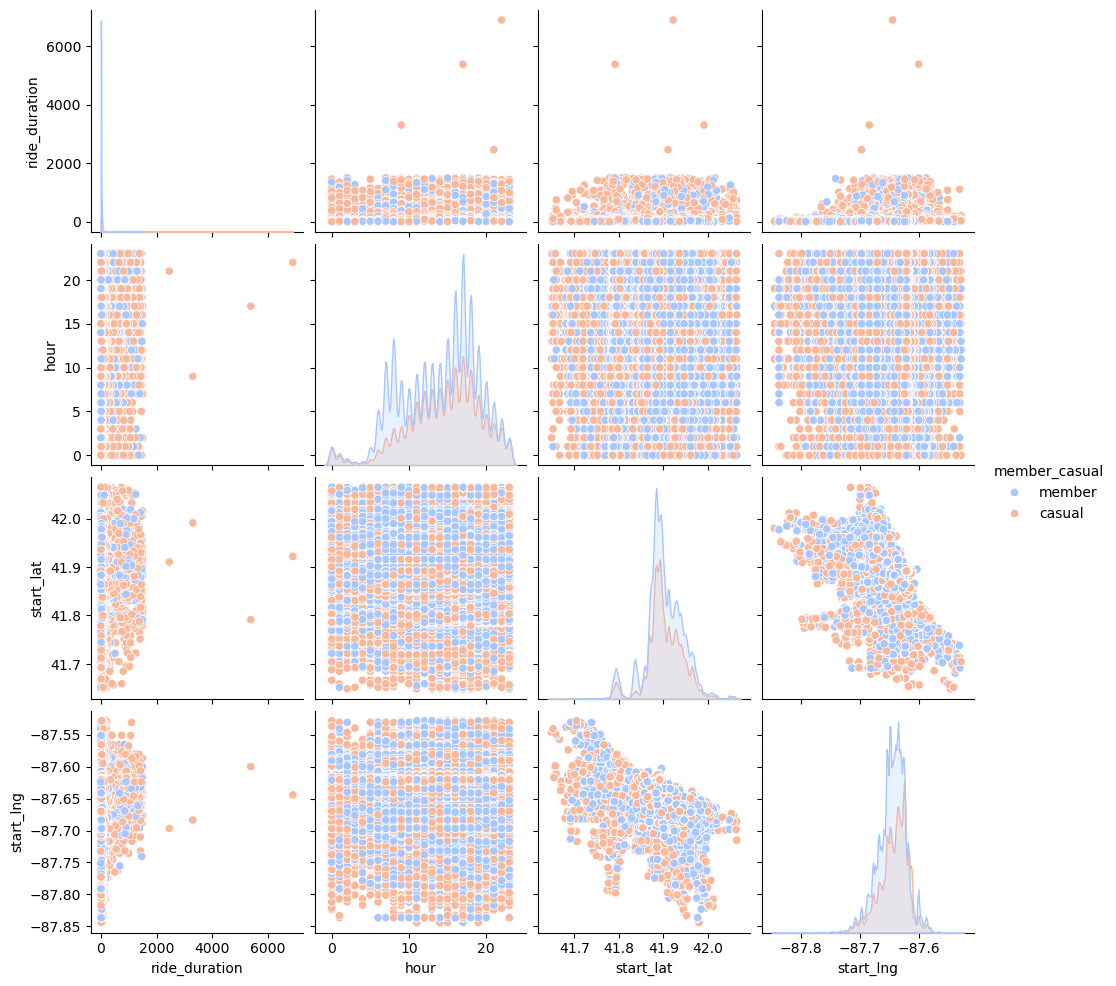

In [38]:
# Remove missing values
pair_df = df[['ride_duration', 'hour', 'start_lat', 'start_lng', 'member_casual']].dropna()
sns.pairplot(pair_df, hue='member_casual', palette='coolwarm')
plt.show()